# Universidad Politécnica Saleciana

## Integrantes: Jhon Macao, Roberto Serpa

## Análisis para determinar si una persona tiene COVID19 o Gripe.

## 3.2	Seleccionar y cargar un dataset

In [1]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

In [2]:
url = 'https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/LQDFSE/IGUJFG'

df = pd.read_csv(url, delimiter = '\t')

df

,Number,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Asthenia,Leukopenia,ExposuretoCovid-19patients,Highriskzone,Temp,BloodTest,RT-PCR,History,Decisionlabel
0,1.0,80,Male,Yes,Yes,Yes,*,*,*,*,*,*,*,*,*,*,*,COVID-19
1,2.0,62,Male,Yes,*,Yes,Yes,97,0.75,Yes,*,*,*,*,*,*,*,COVID-19
2,3.0,57,Male,Yes,*,Yes,Yes,*,*,*,*,Yes,*,*,*,*,*,COVID-19
3,4.0,45,Male,Yes,*,Yes,Yes,*,*,*,Yes,Yes,*,*,*,*,*,COVID-19
4,5.0,63,Male,Yes,*,Yes,Yes,*,*,*,Yes,Yes,*,*,*,*,*,COVID-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126.0,62,Female,No,*,No,Yes,*,*,No,*,No,Yes,38.299999999999997,*,*,*,Flu
126,127.0,63,Male,Yes,*,No,Yes,*,*,No,*,No,Yes,38.5,*,*,*,Flu
127,128.0,63,Female,Yes,*,No,Yes,*,*,No,*,No,Yes,39.299999999999997,*,*,*,Flu
128,129.0,40,Female,No,*,No,No,*,*,No,*,No,Yes,*,*,*,*,Flu


In [3]:
df1 = df
df1 = df1.drop(['Number','Highriskzone','BloodTest','RT-PCR'], axis=1)
df1

,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Asthenia,Leukopenia,ExposuretoCovid-19patients,Temp,History,Decisionlabel
0,80,Male,Yes,Yes,Yes,*,*,*,*,*,*,*,*,COVID-19
1,62,Male,Yes,*,Yes,Yes,97,0.75,Yes,*,*,*,*,COVID-19
2,57,Male,Yes,*,Yes,Yes,*,*,*,*,Yes,*,*,COVID-19
3,45,Male,Yes,*,Yes,Yes,*,*,*,Yes,Yes,*,*,COVID-19
4,63,Male,Yes,*,Yes,Yes,*,*,*,Yes,Yes,*,*,COVID-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,62,Female,No,*,No,Yes,*,*,No,*,No,38.299999999999997,*,Flu
126,63,Male,Yes,*,No,Yes,*,*,No,*,No,38.5,*,Flu
127,63,Female,Yes,*,No,Yes,*,*,No,*,No,39.299999999999997,*,Flu
128,40,Female,No,*,No,No,*,*,No,*,No,*,*,Flu


## 3.3	Desarrollar procesamiento de datos: limpiar ruido, transformar variables categóricas en numéricas, transformación de datos numéricos (estandarización, normalización MinMax, L1, L2, Scaling)

In [4]:
df1 = df1.replace([np.nan],"*")
df1 = df1.replace(['No ','No '],0)
#Gender transformacion de: 'Male','*' a 0 y'Female' a 1
df1['Gender'] = df1['Gender'].replace(['Male','*'], 0)
df1['Gender'] = df1['Gender'].replace(['Female'], 1)
#Fever transformacion de: 'Yes','*' a 1 y'No' a 0
df1['Fever'] = df1['Fever'].replace(['No'], 0)
df1['Fever'] = df1['Fever'].replace(['Yes','*'], 1)
#Dyspnea transformacion de: 'Yes' a 1 y'No','*' a 0
df1['Dyspnea'] = df1['Dyspnea'].replace(['No','*'], 0)
df1['Dyspnea'] = df1['Dyspnea'].replace(['Yes'], 1)
#Nasal transformacion de: 'Yes','*' a 1 y'No' a 0
df1['Nasal'] = df1['Nasal'].replace(['No'], 0)
df1['Nasal'] = df1['Nasal'].replace(['Yes','*'], 1)
#Cough transformacion de: 'Yes','*' a 1 y'No' a 0
df1['Cough'] = df1['Cough'].replace(['No'], 0)
df1['Cough'] = df1['Cough'].replace(['Yes','*'], 1)
#Asthenia transformacion de: 'Yes','*' a 1 y'No' a 0
df1['Asthenia '] = df1['Asthenia '].replace(['No'], 0)
df1['Asthenia '] = df1['Asthenia '].replace(['Yes','*'], 1)
#Leukopenia transformacion de: 'Yes' a 1 y'No','*' a 0
df1['Leukopenia'] = df1['Leukopenia'].replace(['No','*'], 0)
df1['Leukopenia'] = df1['Leukopenia'].replace(['Yes'], 1)
#Exposure to Covid-19 patients transformacion de: 'Yes' a 1 y'No','*' a 0
df1['ExposuretoCovid-19patients'] = df1['ExposuretoCovid-19patients'].replace(['No','*'], 0)
df1['ExposuretoCovid-19patients'] = df1['ExposuretoCovid-19patients'].replace(['Yes'], 1)
#Decision label transformacion de: 'COVID-19' a 1 y'Flu' a 0
df1['Decisionlabel'] = df1['Decisionlabel'].replace(['COVID-19'], 1)
df1['Decisionlabel'] = df1['Decisionlabel'].replace(['Flu'], 0)

In [5]:
#Age transformacion de: '*' a valor numerico tomando la media de los datos ya existentes
ag = df1['Age']
ag = ag.replace(['*'], 0)
age = []
for i in range(0,len(ag)):
    if isinstance(ag[i], str):
        ag[i] = float(ag[i])
        age.append(ag[i])
media = round(np.mean(age),3)
print('Media de Age',media)
df1['Age'] = ag.replace([0.0], media)
#PO2 transformacion de: '*' a valor numerico tomando la media de los datos ya existentes
po = df1['PO2']
po = po.replace(['*'], 0)
po2 = []
for i in range(0,len(po)):
    if isinstance(po[i], str):
        po[i] = float(po[i])
        po2.append(po[i])
media = round(np.mean(po2),3)
print('Media de PO2',media)
df1['PO2'] = po.replace([0.0], media)
#CRP transformacion de: '*' a valor numerico tomando la media de los datos ya existentes
c = df1['CRP']
c = c.replace(['*'], 0)
crp = []
for i in range(0,len(c)):
    if isinstance(c[i], str):
        c[i] = float(c[i])
        crp.append(c[i])
media = round(np.mean(crp),3)
print('Media de CRP',media)
df1['CRP'] = c.replace([0.0], media)
#Temp transformacion de: '*' a valor numerico tomando la media de los datos ya existentes
t = df1['Temp']
t = t.replace(['*'], 0)
temp = []
for i in range(0,len(t)):
    if isinstance(t[i], str):
        t[i] = float(t[i])
        temp.append(t[i])
media = round(np.mean(temp))
print('Media de Temp',media)
df1['Temp'] = t.replace([0.0], media)

Media de Age 60.668
Media de PO2 91.159
Media de CRP 12.73
Media de Temp 38.0


In [6]:
df1

,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Asthenia,Leukopenia,ExposuretoCovid-19patients,Temp,History,Decisionlabel
0,80.0,0,1,1,1,1,91.159,12.73,1,0,0,38.0,*,1
1,62.0,0,1,0,1,1,97.000,0.75,1,0,0,38.0,*,1
2,57.0,0,1,0,1,1,91.159,12.73,1,0,1,38.0,*,1
3,45.0,0,1,0,1,1,91.159,12.73,1,1,1,38.0,*,1
4,63.0,0,1,0,1,1,91.159,12.73,1,1,1,38.0,*,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,62.0,1,0,0,0,1,91.159,12.73,0,0,0,38.3,*,0
126,63.0,0,1,0,0,1,91.159,12.73,0,0,0,38.5,*,0
127,63.0,1,1,0,0,1,91.159,12.73,0,0,0,39.3,*,0
128,40.0,1,0,0,0,0,91.159,12.73,0,0,0,38.0,*,0


In [7]:
#Preprocesado
Xsubset = df1[['Age','Gender','Fever','Dyspnea','Nasal','Cough','PO2','CRP','Asthenia ','Leukopenia',
            'ExposuretoCovid-19patients','Temp','History']]

preprocesador1 = make_column_transformer(
                 (StandardScaler(),['Age','Gender','Fever','Dyspnea','Nasal','Cough','PO2','CRP','Asthenia ','Leukopenia',
                  'ExposuretoCovid-19patients','Temp']),
                 (OneHotEncoder(),['History']))

X = preprocesador1.fit_transform(Xsubset)
categorical_features = ['History']
cnamesDataset1 = ['Age','Gender','Fever','Dyspnea','Nasal','Cough','PO2','CRP','Asthenia ','Leukopenia',
                  'ExposuretoCovid-19patients','Temp']
cnamesDataset2 = preprocesador1.transformers_[1][1].get_feature_names(categorical_features)
cnamesDataset1.extend(cnamesDataset2)
DatasetPreprocesado = pd.DataFrame(data=X,columns=cnamesDataset1)
verProcesado = DatasetPreprocesado.head(6)

final=pd.concat([DatasetPreprocesado,df1[['Decisionlabel']]], axis = 1)
final.head()

,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Asthenia,Leukopenia,...,History_*,History_Asthma,History_COPD,History_Chronic,History_Colon Cancer,History_Croonic,History_DM,History_Kidney cancer,History_None,Decisionlabel
0,1.177309,-0.883641,0.547723,1.680336,0.911584,0.48795,-0.000003,-1.269674e-15,0.869918,-0.178174,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.081104,-0.883641,0.547723,-0.595119,0.911584,0.48795,0.296920,-8.562861e+00,0.869918,-0.178174,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-0.223397,-0.883641,0.547723,-0.595119,0.911584,0.48795,-0.000003,-1.269674e-15,0.869918,-0.178174,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.954200,-0.883641,0.547723,-0.595119,0.911584,0.48795,-0.000003,-1.269674e-15,0.869918,5.612486,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.142004,-0.883641,0.547723,-0.595119,0.911584,0.48795,-0.000003,-1.269674e-15,0.869918,5.612486,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## 3.4	Realizar estadística descriptiva (medidas: media, varianza, correlaciones, etc) de toda la población: buscar variables influyentes.

In [8]:
final.to_csv('COVID-19Preprocesado.csv', index = False)

In [9]:
final = pd.read_csv('COVID-19Preprocesado.csv')

correlacion=final.corr()
correlacion=round(correlacion,3)
correlacion.describe()

,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Asthenia,Leukopenia,...,History_*,History_Asthma,History_COPD,History_Chronic,History_Colon Cancer,History_Croonic,History_DM,History_Kidney cancer,History_None,Decisionlabel
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.037591,-0.058091,0.132136,0.186273,0.219364,0.157364,0.057818,0.054864,0.216318,0.083727,...,-0.122273,0.053864,0.041091,0.049409,0.047636,0.042227,0.048455,0.060909,0.033182,0.231318
std,0.225867,0.283970,0.257930,0.266992,0.356485,0.269449,0.225561,0.213856,0.350369,0.232947,...,0.312940,0.234579,0.234677,0.224765,0.225004,0.224495,0.224856,0.223435,0.279178,0.361717
min,-0.162000,-0.409000,-0.289000,-0.278000,-0.409000,-0.238000,-0.146000,-0.039000,-0.358000,-0.162000,...,-0.661000,-0.244000,-0.346000,-0.244000,-0.244000,-0.244000,-0.244000,-0.244000,-0.661000,-0.398000
25%,-0.028500,-0.193750,0.048000,0.081250,0.080000,0.043000,-0.003000,0.000000,0.077000,-0.016000,...,-0.269500,-0.014750,-0.019250,-0.010250,-0.010250,-0.014750,-0.010250,-0.008000,-0.027750,0.084000
50%,-0.002000,-0.078000,0.059000,0.138000,0.097000,0.052000,0.000000,0.000000,0.093000,0.000000,...,-0.244000,-0.008000,-0.011000,-0.004000,-0.004000,-0.008000,-0.004000,0.000000,-0.021000,0.101500
75%,0.050250,0.012000,0.254000,0.151750,0.306250,0.258250,0.060000,0.000000,0.296000,0.097750,...,0.028500,0.079250,0.066250,0.046750,0.046750,0.046750,0.046750,0.079250,0.082000,0.345000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


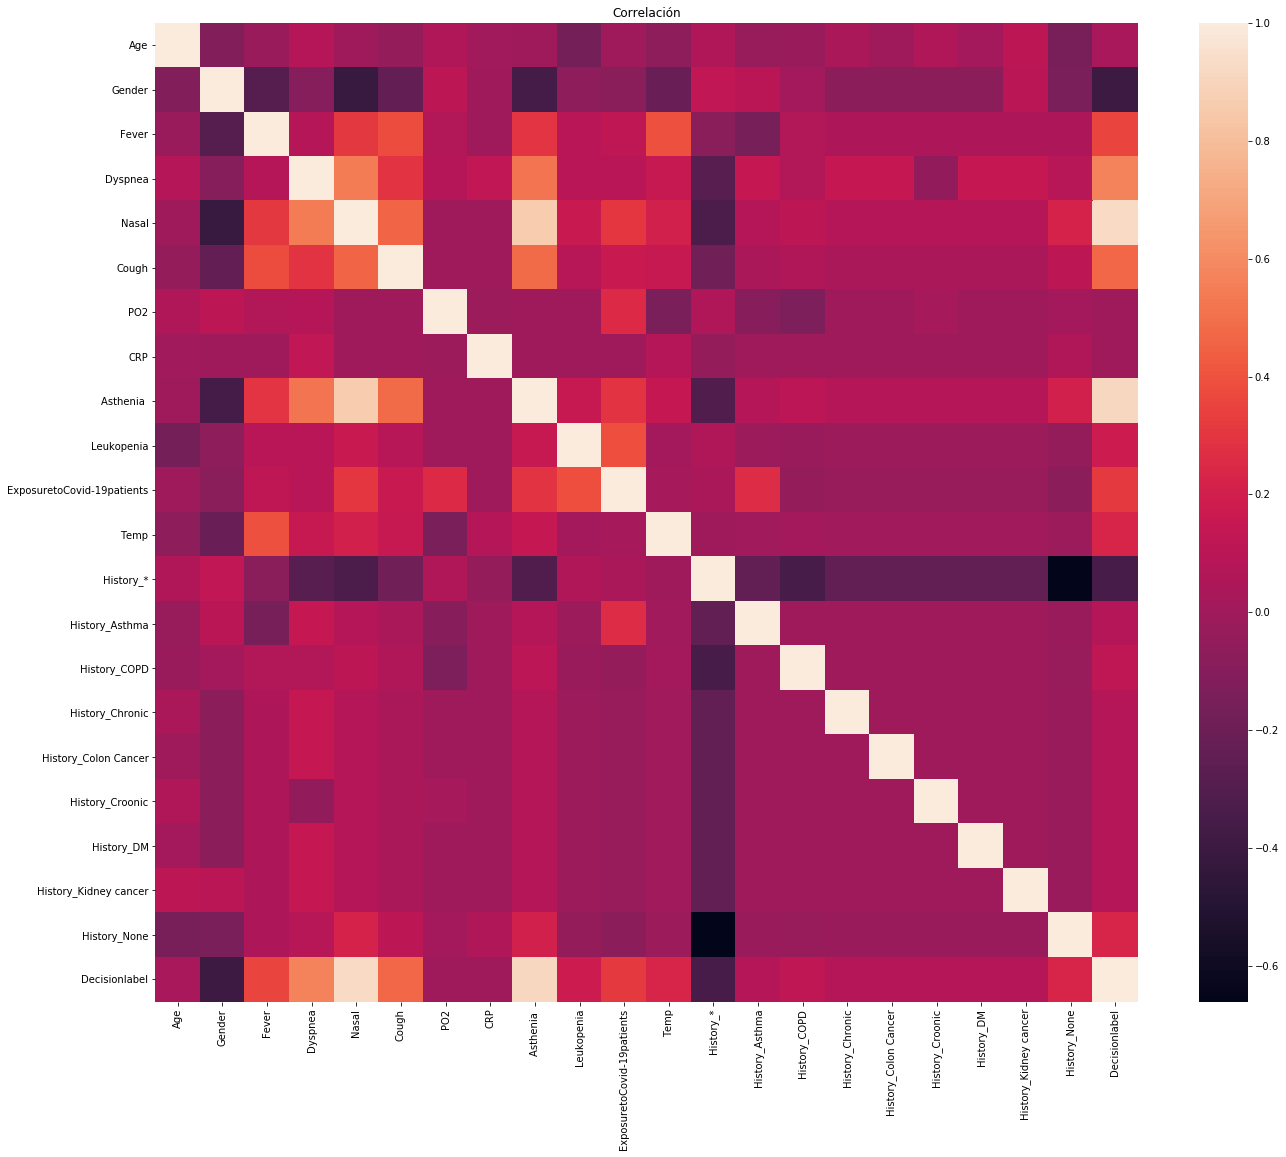

In [10]:
#Se modifico el tamaño de la imagen para obtener un mejor resultado al momento de exportar a una imagen
import seaborn as sb
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(22,18)) 
heat_map = sb.heatmap(correlacion,ax=ax)

plt.title('Correlación')
plt.savefig('mapaCalor.png',dpi=200)
plt.show()

## 3.5	Realizar clustering

## 3.6	Realizar estadística descriptiva de cada cluster: buscar variables influyentes

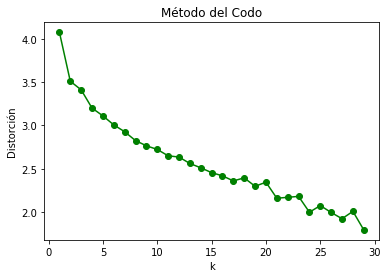

Text(0.5, 1.0, 'Grafica de ejecucion')

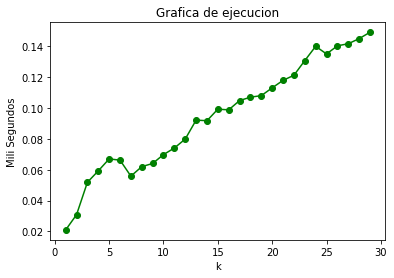

In [11]:
import matplotlib.pyplot as plt
import time
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 

from sklearn.cluster import KMeans

min_max_scaler = preprocessing.MinMaxScaler() 

x=final
x = StandardScaler().fit_transform(x)
x = min_max_scaler.fit_transform(x)

X = final
distortions=[]
K = range(1,30)
tiempoT = []

for k in K:
    tiempoIni=time.time()
    kmeanModel = KMeans(n_clusters=k,init='k-means++').fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'seuclidean'),axis=1)) / X.shape[0])
    tiempoFin = time.time()
    tiempoT.append(tiempoFin-tiempoIni)
plt.plot(K, distortions, color='green', marker='o')
plt.xlabel('k')
plt.ylabel('Distorción')
plt.title('Método del Codo')
plt.savefig('clusteringKOptimo.png',dpi=200)
plt.show()
plt.figure()
plt.plot(K, tiempoT, color='green', marker='o')
plt.xlabel('k')
plt.ylabel('Mili Segundos')
plt.title('Grafica de ejecucion')

## 3.7	Aplicar reducción de dimensionalidad de todo el conjunto

Varianzas:
[0.278 0.116 0.102 0.088 0.084 0.077 0.061 0.055 0.047 0.039 0.027 0.011
 0.009 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.    0.   ]


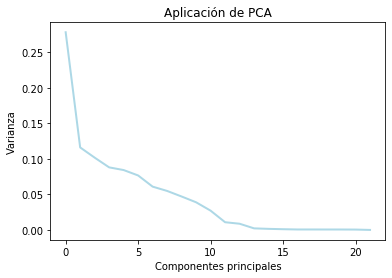

In [12]:
num_components=22
pca = PCA(num_components)
principalComponents = pca.fit_transform(final)

explained_variance=pca.explained_variance_ratio_
explained_variance
print('Varianzas:')
print(np.around(explained_variance, decimals=3))
a = range(num_components)
num_pc= a[::1]

principalDf = pd.DataFrame(data = principalComponents
             , columns = num_pc)

plt.plot(num_pc,explained_variance, color='lightblue', linestyle='-',linewidth=2)
plt.ylabel('Varianza')
plt.xlabel('Componentes principales')
plt.title('Aplicación de PCA')
plt.savefig('pca.png',dpi=200)
plt.show()

## 3.8	Realizar un Split con 20% en Test.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#PREPROCESAMIENTO
X = final.iloc[:, 0:21].values
y = final.iloc[:, 21].values
# SPLITTING DATASET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
#APLICACION DE PCA SIN ESPECIFICAR LAS CARACTERISTICAS
import time

tiempoT = []

pca = PCA()  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_  
#Entrenamiento
#Se utiliza Random Forest.

tiempoIni=time.time()

classifier = RandomForestClassifier(max_depth=5, random_state=0)  
classifier.fit(X_train_pca, y_train)
# Prediccion de los resultados
y_pred_pca = classifier.predict(X_test_pca)
#EVALUACION
cm = confusion_matrix(y_test, y_pred_pca)  
print(cm)  
print('Accuracy: ' + str(accuracy_score(y_test, y_pred_pca)))

tiempoFin = time.time()
tiempoT.append(tiempoFin-tiempoIni)

print(tiempoT)

[[ 9  0]
 [ 1 16]]
Accuracy: 0.9615384615384616
[0.1077427864074707]


In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans

# Ejecuacion del Kmeans Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(principalDf, 2)
kmeans = pd.DataFrame(clust_labels)

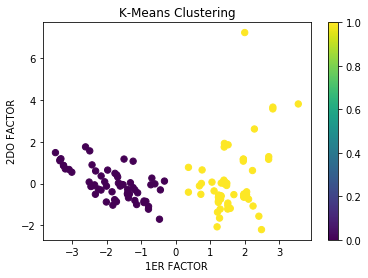

In [17]:
# Mapa de Calor
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDf[0],principalDf[1],
                     c=kmeans[0],s=40)
ax.set_title('K-Means Clustering')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
plt.colorbar(scatter)
plt.savefig('K-MeansClustering.png',dpi=200)